The purpose of this notebook is to run a given trained model on input images/video and visualize the desmoking. We will first desmoke some images and display them for qualitative analysis. Then we can experiment with generating side by side de-smoked videos. We will start by loading in our libraries and then loading the dataset. This time we will want to load in the real smoked images which we were able to identify in the synthetic_smoke_prep ipython notebook.

In [1]:
import datetime
import torch
import gan
import shutil
from synth_data_source_inf import loadData
import models
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [2]:
args_data = {
        'pre_path' : 'C:/Users/Karol/Documents/DL4H',
        'cache_subfolder' : '/datasets/cholec80/cache',
        'cache_subfolder_test' : '/datasets/cholec80/cache_testset',
        'syn_smoke_subfolder' : '/datasets/cholec80/synthetic_smoke/',
        'dataset_subfolder' : '/datasets/cholec80/input_formatted',
        'dataset_subfolder_test' : '/datasets/cholec80/input_formatted_test'
}

run_folder_path = args_data['pre_path'] + '/runs'

args = {      
        'save' : run_folder_path+'/{}'.format(datetime.datetime.now().strftime('%Y-%m-%d_%H-%M-%S')),
        'batch' : 8,
        'lr' : 0.0002,
        'epochs' : 60,
        'gpu' : 0,
        'use_dark_channel' : False,
        'load_net' : None,
        'run_val_and_test_every_steps' : 1718 #6865
}

In [3]:
inf_data_trainset, inf_data_testset, inf_data_synthtest = loadData(args_data)

CSV IS STILL GOOD SO GOOD
CSV is good?


Number of rows in csv file is 43325 but video length is 43326. Recommend deleting csv file so it is recomputed: C:/Users/Karol/Documents/DL4H/datasets/cholec80/input_formatted\video01\quality_metrics.csv.


NUM ROWS IN CSV WRONG
CSV IS STILL GOOD SO GOOD
CSV is good?


Number of rows in csv file is 70975 but video length is 70976. Recommend deleting csv file so it is recomputed: C:/Users/Karol/Documents/DL4H/datasets/cholec80/input_formatted\video02\quality_metrics.csv.


NUM ROWS IN CSV WRONG
CSV IS STILL GOOD SO GOOD
CSV is good?


Number of rows in csv file is 145700 but video length is 145701. Recommend deleting csv file so it is recomputed: C:/Users/Karol/Documents/DL4H/datasets/cholec80/input_formatted\video03\quality_metrics.csv.


NUM ROWS IN CSV WRONG
CSV IS STILL GOOD SO GOOD
CSV is good?


Number of rows in csv file is 38050 but video length is 38051. Recommend deleting csv file so it is recomputed: C:/Users/Karol/Documents/DL4H/datasets/cholec80/input_formatted\video04\quality_metrics.csv.


NUM ROWS IN CSV WRONG
CSV IS STILL GOOD SO GOOD
CSV is good?


Number of rows in csv file is 58600 but video length is 58601. Recommend deleting csv file so it is recomputed: C:/Users/Karol/Documents/DL4H/datasets/cholec80/input_formatted\video05\quality_metrics.csv.


NUM ROWS IN CSV WRONG
CSV IS STILL GOOD SO GOOD
CSV is good?


Number of rows in csv file is 53825 but video length is 53826. Recommend deleting csv file so it is recomputed: C:/Users/Karol/Documents/DL4H/datasets/cholec80/input_formatted\video06\quality_metrics.csv.


NUM ROWS IN CSV WRONG
CSV IS STILL GOOD SO GOOD
CSV is good?


Number of rows in csv file is 113925 but video length is 113926. Recommend deleting csv file so it is recomputed: C:/Users/Karol/Documents/DL4H/datasets/cholec80/input_formatted\video07\quality_metrics.csv.


NUM ROWS IN CSV WRONG
CSV IS STILL GOOD SO GOOD
CSV is good?


Number of rows in csv file is 37975 but video length is 37976. Recommend deleting csv file so it is recomputed: C:/Users/Karol/Documents/DL4H/datasets/cholec80/input_formatted\video08\quality_metrics.csv.


NUM ROWS IN CSV WRONG
CSV IS STILL GOOD SO GOOD
CSV is good?


Number of rows in csv file is 67550 but video length is 67551. Recommend deleting csv file so it is recomputed: C:/Users/Karol/Documents/DL4H/datasets/cholec80/input_formatted\video09\quality_metrics.csv.


NUM ROWS IN CSV WRONG
CSV IS STILL GOOD SO GOOD
CSV is good?


Number of rows in csv file is 43725 but video length is 43726. Recommend deleting csv file so it is recomputed: C:/Users/Karol/Documents/DL4H/datasets/cholec80/input_formatted\video10\quality_metrics.csv.


NUM ROWS IN CSV WRONG
CSV IS STILL GOOD SO GOOD
CSV is good?


Number of rows in csv file is 80500 but video length is 80501. Recommend deleting csv file so it is recomputed: C:/Users/Karol/Documents/DL4H/datasets/cholec80/input_formatted\video11\quality_metrics.csv.


NUM ROWS IN CSV WRONG
CSV IS STILL GOOD SO GOOD
CSV is good?


Number of rows in csv file is 27250 but video length is 27251. Recommend deleting csv file so it is recomputed: C:/Users/Karol/Documents/DL4H/datasets/cholec80/input_formatted\video12\quality_metrics.csv.


NUM ROWS IN CSV WRONG
CSV IS STILL GOOD SO GOOD
CSV is good?


Number of rows in csv file is 24525 but video length is 24526. Recommend deleting csv file so it is recomputed: C:/Users/Karol/Documents/DL4H/datasets/cholec80/input_formatted\video13\quality_metrics.csv.


NUM ROWS IN CSV WRONG
CSV IS STILL GOOD SO GOOD
CSV is good?


Number of rows in csv file is 42700 but video length is 42701. Recommend deleting csv file so it is recomputed: C:/Users/Karol/Documents/DL4H/datasets/cholec80/input_formatted\video14\quality_metrics.csv.


NUM ROWS IN CSV WRONG
CSV IS STILL GOOD SO GOOD
CSV is good?


Number of rows in csv file is 51450 but video length is 51451. Recommend deleting csv file so it is recomputed: C:/Users/Karol/Documents/DL4H/datasets/cholec80/input_formatted\video15\quality_metrics.csv.


NUM ROWS IN CSV WRONG
CSV IS STILL GOOD SO GOOD
CSV is good?


Number of rows in csv file is 73925 but video length is 73926. Recommend deleting csv file so it is recomputed: C:/Users/Karol/Documents/DL4H/datasets/cholec80/input_formatted\video16\quality_metrics.csv.


NUM ROWS IN CSV WRONG
CSV IS STILL GOOD SO GOOD
CSV is good?


Number of rows in csv file is 32600 but video length is 32601. Recommend deleting csv file so it is recomputed: C:/Users/Karol/Documents/DL4H/datasets/cholec80/input_formatted\video17\quality_metrics.csv.


NUM ROWS IN CSV WRONG
CSV IS STILL GOOD SO GOOD
CSV is good?


Number of rows in csv file is 48550 but video length is 48551. Recommend deleting csv file so it is recomputed: C:/Users/Karol/Documents/DL4H/datasets/cholec80/input_formatted\video18\quality_metrics.csv.


NUM ROWS IN CSV WRONG
CSV IS STILL GOOD SO GOOD
CSV is good?


Number of rows in csv file is 60600 but video length is 60601. Recommend deleting csv file so it is recomputed: C:/Users/Karol/Documents/DL4H/datasets/cholec80/input_formatted\video19\quality_metrics.csv.


NUM ROWS IN CSV WRONG
CSV IS STILL GOOD SO GOOD
CSV is good?


Number of rows in csv file is 36225 but video length is 36226. Recommend deleting csv file so it is recomputed: C:/Users/Karol/Documents/DL4H/datasets/cholec80/input_formatted\video20\quality_metrics.csv.


NUM ROWS IN CSV WRONG
43326
43325
70976
70975
145701
145700
38051
38050
58601
58600
53826
53825
113926
113925
37976
37975
67551
67550
43726
43725
80501
80500
27251
27250
24526
24525
42701
42700
51451
51450
73926
73925
32601
32600
48551
48550
60601
60600
36226
36225
CSV IS STILL GOOD SO GOOD
CSV is good?


Number of rows in csv file is 31450 but video length is 31451. Recommend deleting csv file so it is recomputed: C:/Users/Karol/Documents/DL4H/datasets/cholec80/input_formatted_test\video21\quality_metrics.csv.


NUM ROWS IN CSV WRONG
CSV IS STILL GOOD SO GOOD
CSV is good?


Number of rows in csv file is 38300 but video length is 38301. Recommend deleting csv file so it is recomputed: C:/Users/Karol/Documents/DL4H/datasets/cholec80/input_formatted_test\video22\quality_metrics.csv.


NUM ROWS IN CSV WRONG
31451
31450
38301
38300


First we load in our model from wherever we have our checkpoint stored. YOU WILL NEED TO CHANGE THIS TO WHERE YOUR TRAINED MODELS (OR DOWNLOADED PRE-TRAINED MODELS) ARE

In [4]:
mynet = models.UNET()
paramdict = torch.load('C:\\Users\\Karol\\Documents\\DL4H\\runs\\full_nodark_60ep2023-05-01_10-24-29\\epoch_20.pth')
mynet.load_state_dict(paramdict)
mynet.eval()

UNET(
  (drp): Dropout(p=0.5, inplace=False)
  (sequence): ParameterList(
      (0): Object of type: Conv2d
      (1): Object of type: LeakyReLU
      (2): Object of type: Conv2d
      (3): Object of type: BatchNorm2d
      (4): Object of type: LeakyReLU
      (5): Object of type: Conv2d
      (6): Object of type: BatchNorm2d
      (7): Object of type: LeakyReLU
      (8): Object of type: Conv2d
      (9): Object of type: BatchNorm2d
      (10): Object of type: LeakyReLU
      (11): Object of type: Conv2d
      (12): Object of type: BatchNorm2d
      (13): Object of type: LeakyReLU
      (14): Object of type: Conv2d
      (15): Object of type: BatchNorm2d
      (16): Object of type: LeakyReLU
      (17): Object of type: Conv2d
      (18): Object of type: BatchNorm2d
      (19): Object of type: LeakyReLU
      (20): Object of type: Conv2d
      (21): Object of type: ReLU
      (22): Object of type: ConvTranspose2d
      (23): Object of type: BatchNorm2d
      (24): Object of type: ReLU


Now we create a function to select only clips over a certain number of frames.

In [5]:
def selectGoodClips(numFrames, dataset):
    outset = []
    for x in range(0, len(dataset)):
        if len(dataset[x]) >= numFrames:
            outset.append(dataset[x])
    return outset

Now we take those sets, and run them through our model, and feed them into opencv to create a video with the new and old frames side by side. Original videos are 25fps. We will target 4 and 2 second clips minimum and a total video size of approximately 2 minutes to limit processing time. We will process a video for the test and validation sets separately. Then we will process a 'slideshow' of the synthetically smoked data at 1fps.

In [6]:
frame_rate = 25
target_time_output_minutes = 2
min_clip_time_seconds = 4
min_clip_time_seconds_test = 2
frame_target = target_time_output_minutes*60*frame_rate
min_clip_frames = frame_rate*min_clip_time_seconds
min_clip_frames_test = frame_rate*min_clip_time_seconds_test

inf_data_testset_2 = selectGoodClips(min_clip_frames_test, inf_data_testset)
inf_data_trainset_2 = selectGoodClips(min_clip_frames, inf_data_trainset)
inf_data_synthtest_2 = selectGoodClips(min_clip_frames_test, inf_data_synthtest)

c:\Users\Karol\.conda\envs\DL4H_CS598_2\lib\site-packages\torchvision\transforms\functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(


Set the output directory for where you would like your video to be saved!

In [7]:
output_directory = 'C:/Users/Karol/Documents/DL4H/final_rep_assets/'

filename_test = 'test_video.avi'
filename_val = 'validate_video.avi'
filename_synthtest = 'synth_video.avi'

filename_debug = 'debug_video.avi'
frame_res = 256

out_test = cv2.VideoWriter(output_directory+filename_test,cv2.VideoWriter_fourcc(*'DIVX'), frame_rate, (int(frame_res), int(frame_res)))
out_val = cv2.VideoWriter(output_directory+filename_val,cv2.VideoWriter_fourcc(*'DIVX'), frame_rate, (int(frame_res), int(frame_res)))
out_synthtest = cv2.VideoWriter(output_directory+filename_synthtest,cv2.VideoWriter_fourcc(*'DIVX'), 1, (int(frame_res), int(frame_res)))
# out_debug = cv2.VideoWriter(output_directory+filename_debug,cv2.VideoWriter_fourcc(*'DIVX'), frame_rate, (int(frame_res), int(frame_res)))

def writeVideoComp(writer, dataset, frame_target, model):
    frame_counter = 0
    with torch.no_grad():
        for x in dataset:
            if frame_counter > frame_target:
                break
            for idx in range(0, len(x)): # We want the bg_image component. Not synthetic data.
                frame = x[idx][0]
                desmoked_frame = model(frame.unsqueeze(0)).detach()[0]
                out_frame = torch.cat((frame.type(torch.float64), desmoked_frame.type(torch.float64)), dim=2)
                out_frame = (out_frame+1.0)*(255.0/2.0)
                out_frame = torch.permute(out_frame, (1,2,0))
                out_frame = out_frame.numpy()
                out_frame = out_frame.astype(np.uint8)
                out_frame = out_frame[:,:,[2,1,0]]
                writer.write(out_frame)
                frame_counter += 1
    writer.release()

def writeVideoCompSliding(writer, dataset, frame_target, model, window_size=100, window_speed=2):
    frame_counter = 0
    window_offset = 0
    window_direction = 1
    with torch.no_grad():
        for x in dataset:
            if frame_counter > frame_target:
                break
            for idx in range(0, len(x)): # We want the bg_image component. Not synthetic data.
                frame = x[idx][0]
                desmoked_frame = model(frame.unsqueeze(0)).detach()[0]
                frame_frag = torch.split(frame.type(torch.float64), [window_offset, window_size, 256-window_size-window_offset], dim=1)
                smoke_frag = torch.split(desmoked_frame.type(torch.float64), [window_offset, window_size, 256-window_size-window_offset], dim=1)
                out_frame = torch.cat((frame_frag[0], smoke_frag[1], frame_frag[2]), dim=1)
                out_frame = (out_frame+1.0)*(255.0/2.0)
                out_frame = torch.permute(out_frame, (1,2,0))
                out_frame = out_frame.numpy()
                out_frame = out_frame.astype(np.uint8)
                out_frame = out_frame[:,:,[2,1,0]]
                writer.write(out_frame)
                frame_counter += 1
                window_offset += window_speed*window_direction
                if window_offset > 255-window_size:
                    window_offset = 255-window_size
                    window_direction *= -1
                elif window_offset < 0:
                    window_offset = 0
                    window_direction *= -1
    writer.release()

Now we execute the actual inference and video creation.

In [8]:
print(len(inf_data_testset_2))
print(len(inf_data_trainset_2))
print(len(inf_data_synthtest_2))

12
7
0


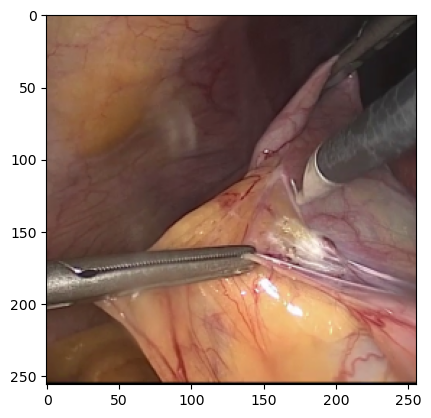

In [9]:
framein = inf_data_testset_2[0][0][0]
testpoint = torch.split(framein, [0,64,192], dim=1)
out_frame = torch.permute(torch.cat(testpoint, dim=1), (1,2,0)).type(torch.float64)
out_frame = (out_frame+1.0)*(255.0/2.0)
out_frame = out_frame.numpy().astype(np.uint8)

plt.imshow(out_frame)
plt.show()

In [10]:
writeVideoCompSliding(out_test, inf_data_testset_2, frame_target, mynet)
writeVideoCompSliding(out_val, inf_data_trainset_2, frame_target, mynet)
writeVideoCompSliding(out_synthtest, [inf_data_synthtest], target_time_output_minutes*60, mynet, window_size=64, window_speed=16)

Note that the first two videos should show up as time-coherent surgeries with a desmoked slice 100pixels high sliding across the screen.

The last is not time coherent and synthtetic images.

You will also notice from these videos that the models are clearly overfit on the training data and ESPECIALLY the synthetic smoke data. It appears the synthetic smoke data still does not match the surgery smoke closely enough.

While the images in the real surgeries are enhanced and de-smoked it appears that the models are tuned for far heavier smoke and therefore do not do much for lightly smoke obscured vision. More surgery data would have to be analyzed to understand how to proceed from here to better the model.


Either way, this notebook is beyond the reproduction of the original paper that was set out to be accomplished. These are just additional interesting observations which show that the image quality metrics may not mean much in the end as the de-smoking of the surgery imaged is only being measured qualitatively. If one could quantitatvely determine the quality of desmoking real surgeries that would be incredibly helpful, but this is not an easy challenge due to lack of certain ground truth.

Note that no cholec video data is distributed with this repo or notebook as the appropriate route to attain it is via <http://camma.u-strasbg.fr/datasets> with proper approval. TAs can reach out to me by email should example videos from this notebook be desired or required and I can demo or provide them privately.